In [1]:
import pandas as pd
import numpy as np

# Generate mock data
np.random.seed(42)
project_data = {
    'Project_ID': np.arange(1, 21),
    'Project_Name': [f'Project_{i}' for i in range(1, 21)],
    'Location': np.random.choice(['Koregaon Park', 'Baner', 'Hinjewadi', 'Viman Nagar'], 20),
    'Launch_Date': pd.date_range(start='2014-01-01', periods=20, freq='6M'),
    'Completion_Date': pd.date_range(start='2016-01-01', periods=20, freq='6M'),
    'Total_Units': np.random.randint(100, 500, 20),
    'Units_Sold': np.random.randint(50, 500, 20),
    'Price_Per_Unit': np.random.uniform(50, 150, 20),  # in lakhs
    'Marketing_Spend': np.random.uniform(10, 50, 20),  # in lakhs
    'Customer_Age': np.random.randint(25, 60, 20),
    'Customer_Income': np.random.uniform(5, 20, 20)  # in lakhs per annum
}

df = pd.DataFrame(project_data)

# Save to CSV
df.to_csv('real_estate_data.csv', index=False)
df.head()


,Project_ID,Project_Name,Location,Launch_Date,Completion_Date,Total_Units,Units_Sold,Price_Per_Unit,Marketing_Spend,Customer_Age,Customer_Income
0,1,Project_1,Hinjewadi,2014-01-31,2016-01-31,249,495,88.541650,23.061631,59,16.411776
1,2,Project_2,Viman Nagar,2014-07-31,2016-07-31,408,224,51.596625,32.817759,57,13.419158
2,3,Project_3,Koregaon Park,2015-01-31,2017-01-31,357,495,73.089383,30.833370,29,16.564508
3,4,Project_4,Hinjewadi,2015-07-31,2017-07-31,443,100,74.102547,48.446881,52,12.406934
4,5,Project_5,Hinjewadi,2016-01-31,2018-01-31,393,413,118.326352,43.781354,31,12.840992


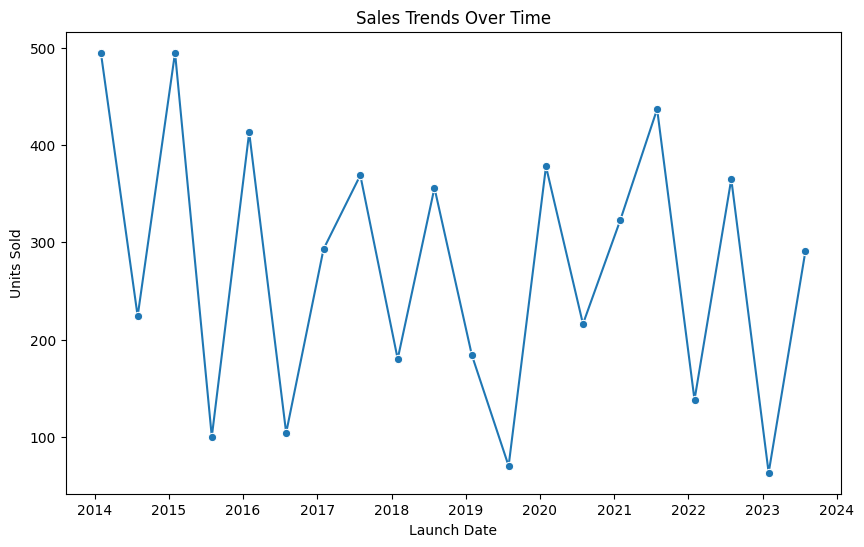

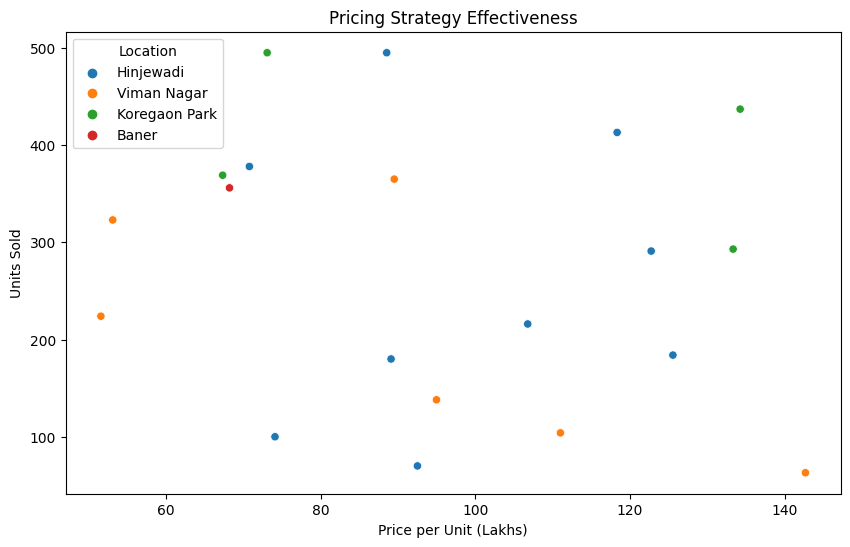

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trends over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Launch_Date', y='Units_Sold', data=df, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Launch Date')
plt.ylabel('Units Sold')
plt.show()

# Pricing vs. Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price_Per_Unit', y='Units_Sold', hue='Location', data=df)
plt.title('Pricing Strategy Effectiveness')
plt.xlabel('Price per Unit (Lakhs)')
plt.ylabel('Units Sold')
plt.show()


Mean Squared Error: 53031.70702280624


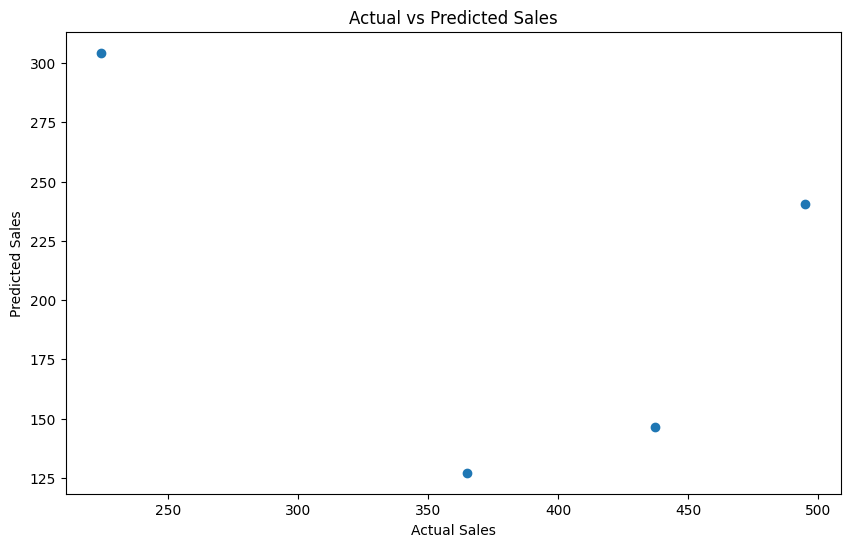

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
X = df[['Price_Per_Unit', 'Marketing_Spend', 'Customer_Age', 'Customer_Income']]
y = df['Units_Sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [5]:
# Assuming we've determined optimal ranges from our analysis
optimal_price = df['Price_Per_Unit'].mean()
optimal_marketing_spend = df['Marketing_Spend'].mean()

print(f"Recommended Price Per Unit: {optimal_price} Lakhs")
print(f"Recommended Marketing Spend: {optimal_marketing_spend} Lakhs")


Recommended Price Per Unit: 95.37505528595518 Lakhs
Recommended Marketing Spend: 28.917578452178056 Lakhs


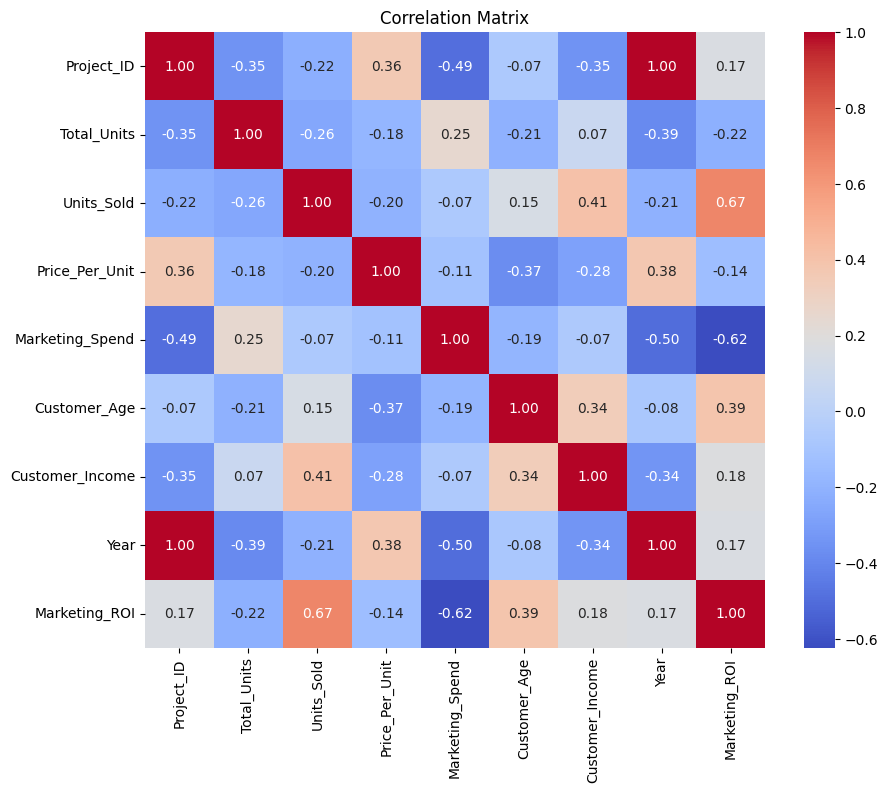

In [11]:
# Correlation matrix with numeric_only=True to avoid the warning
correlation_matrix = df.corr(numeric_only=True)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


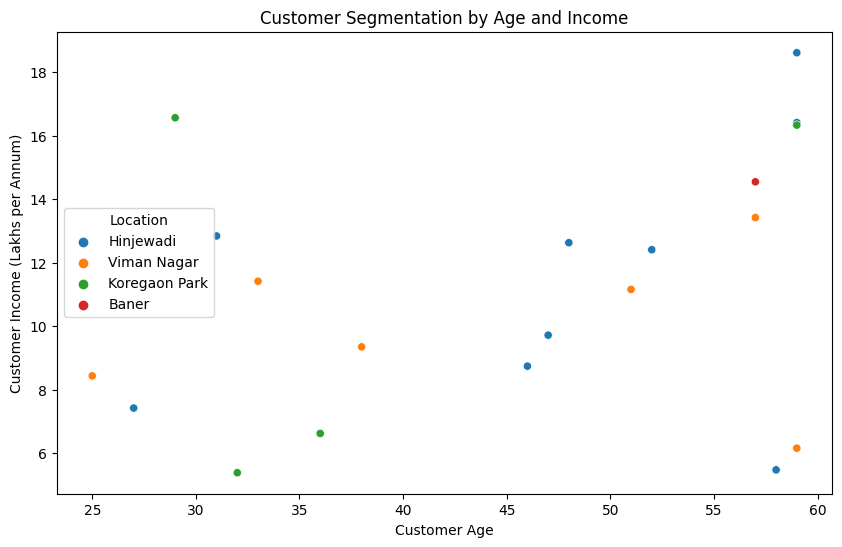

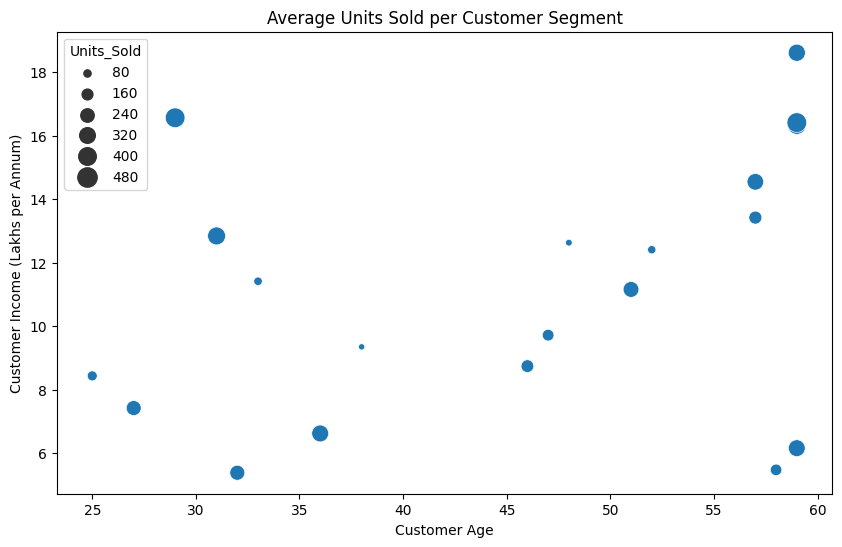

In [7]:
# Scatter plot of customer age vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Customer_Income', hue='Location', data=df)
plt.title('Customer Segmentation by Age and Income')
plt.xlabel('Customer Age')
plt.ylabel('Customer Income (Lakhs per Annum)')
plt.show()

# Grouping data to find average units sold per customer segment
customer_segments = df.groupby(['Customer_Age', 'Customer_Income']).agg({'Units_Sold': 'mean'}).reset_index()

# Visualizing customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Customer_Income', size='Units_Sold', data=customer_segments, sizes=(20, 200))
plt.title('Average Units Sold per Customer Segment')
plt.xlabel('Customer Age')
plt.ylabel('Customer Income (Lakhs per Annum)')
plt.show()


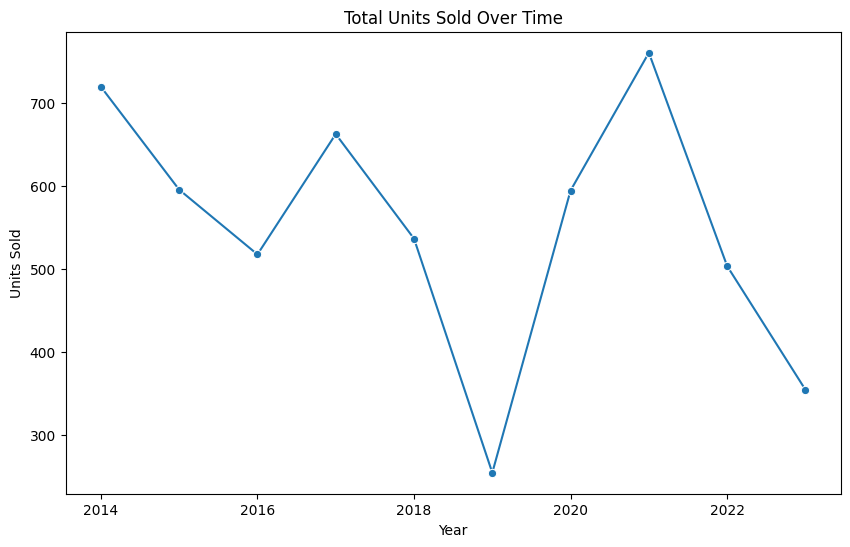

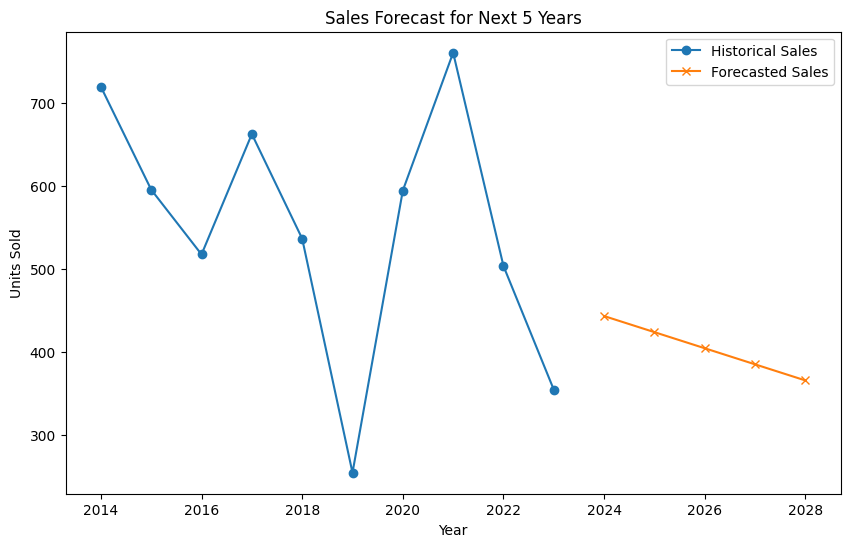

In [8]:
# Aggregating sales over time
df['Year'] = pd.DatetimeIndex(df['Launch_Date']).year
sales_over_time = df.groupby('Year')['Units_Sold'].sum().reset_index()

# Time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Units_Sold', data=sales_over_time, marker='o')
plt.title('Total Units Sold Over Time')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()

# Simple forecast using linear regression
X_time = sales_over_time[['Year']]
y_time = sales_over_time['Units_Sold']

model_time = LinearRegression()
model_time.fit(X_time, y_time)

# Predicting for next 5 years
future_years = pd.DataFrame({'Year': np.arange(2024, 2029)})
future_sales = model_time.predict(future_years)

# Plotting forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Year'], sales_over_time['Units_Sold'], label='Historical Sales', marker='o')
plt.plot(future_years['Year'], future_sales, label='Forecasted Sales', marker='x')
plt.title('Sales Forecast for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


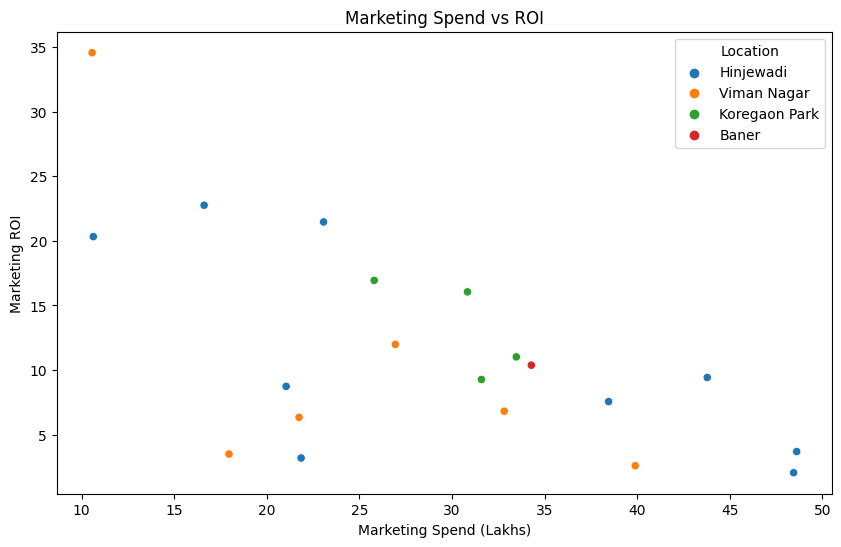

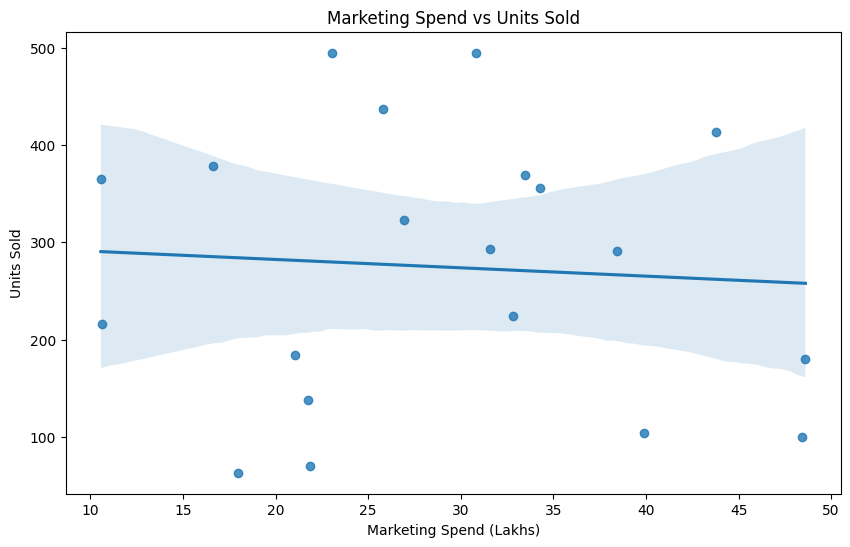

In [9]:
# ROI calculation
df['Marketing_ROI'] = df['Units_Sold'] / df['Marketing_Spend']

# Scatter plot of marketing spend vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend', y='Marketing_ROI', hue='Location', data=df)
plt.title('Marketing Spend vs ROI')
plt.xlabel('Marketing Spend (Lakhs)')
plt.ylabel('Marketing ROI')
plt.show()

# Analyzing the relationship between marketing spend and units sold
plt.figure(figsize=(10, 6))
sns.regplot(x='Marketing_Spend', y='Units_Sold', data=df)
plt.title('Marketing Spend vs Units Sold')
plt.xlabel('Marketing Spend (Lakhs)')
plt.ylabel('Units Sold')
plt.show()


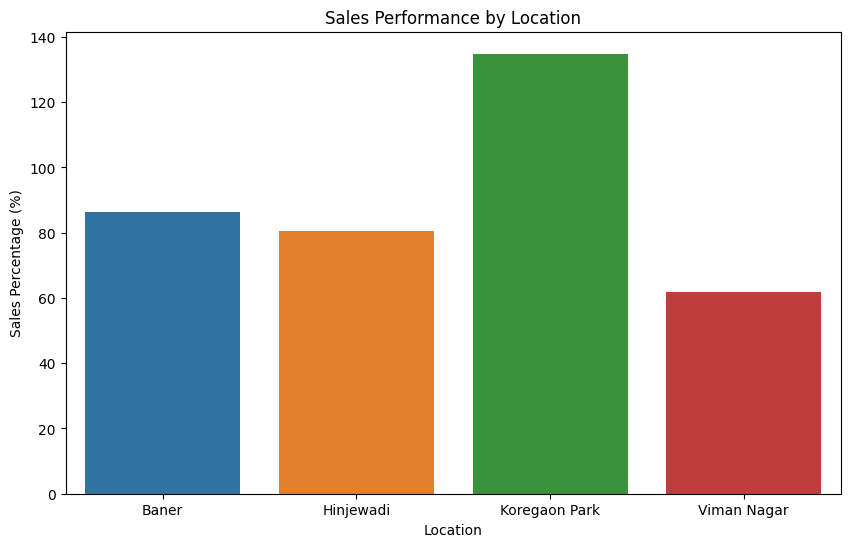

In [10]:
# Grouping data by location
location_performance = df.groupby('Location').agg({'Units_Sold': 'sum', 'Total_Units': 'sum'}).reset_index()

# Calculating sales percentage
location_performance['Sales_Percentage'] = (location_performance['Units_Sold'] / location_performance['Total_Units']) * 100

# Bar plot for location-based performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Sales_Percentage', data=location_performance)
plt.title('Sales Performance by Location')
plt.xlabel('Location')
plt.ylabel('Sales Percentage (%)')
plt.show()
